In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Vectorize and put data columnwise
x_train_vectorized = x_train.reshape(60000,784).T

# Remove means
means = np.mean(x_train_vectorized, 1).reshape(784,1)
x_train_mr = x_train_vectorized - means

In [4]:
U,s,VT = np.linalg.svd(x_train_mr,full_matrices=False)

Text(0, 0.5, 'Log(Singular Value)')

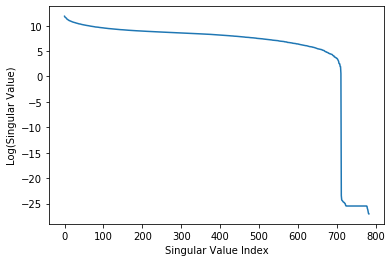

In [79]:
# If we take a quick look at s, there's a clear cut off where the singular values drop under 1
plt.plot(range(784), np.log(s))
plt.xlabel("Singular Value Index")
plt.ylabel("Log(Singular Value)")

In [6]:
# Let's grab those first ones
s_red = [ i for i in s if i > 1]

# And get our new matrix
A  = U[:,:len(s_red)]@np.diag(s_red)@VT[:len(s_red),:]

# Add back means and make data rowwise again
A_lr = (A+means).T

In [7]:
## function to plot images in grid
#  Used in ECE: 601 HW as well 
def show_images(images, rows, cols):
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray_r)
        plt.xticks(())
        plt.yticks(())
    plt.show()

In [30]:
print(U[:,:len(s_red)].shape)
print(len(s_red))
print(VT[:len(s_red),:].shape)

(784, 712)
712
(712, 60000)


In [56]:
y_truths = [[1 if i == j else -1 for i in y_train] for j in range(10)]

# This is the fast way to do this compared to above, tested by using time module
# Vals for whether something is a 0, 1, 2, ...
# y_truths = [(y_train[:] == i).astype("int") for i in range(10)]

In [57]:
# can play around with lambda later, should be really small since we already controlled for a lot of noise
lam = .00001

# gets w's for numbers 0-9
dubs = [np.linalg.inv(A_lr.T@A_lr + lam*np.identity(784))@A_lr.T@y_truths[i] for i in range(10)]

In [58]:
y_test_truths = [[1 if i == j else -1 for i in y_test] for j in range(10)]

# y_test_truths = [(y_test[:] == i).astype("int") for i in range(10)]

In [59]:
# Get y_hats of individual error rates for each classification #
y_hats = [x_test_rs@dubs[i] for i in range(10)]

In [60]:
# Get error_rates of individual error rates for each classification #
error_rates = [np.sum(np.sign(y_hats[i][:]) != y_test_truths[i][:])/10000 for i in range(10)]

In [61]:
print(error_rates)

[0.0124, 0.0156, 0.0386, 0.0424, 0.0301, 0.0515, 0.0259, 0.0306, 0.0679, 0.0553]


In [62]:
y_hats_arr = np.array(y_hats)
print(y_hats_arr.shape)

(10, 10000)


In [64]:
print(y_hats_arr[0, 0:30])
print(np.sign(y_hats_arr[0, 0:30]))
print(y_test_truths[0][0:30])

[-0.80789342 -0.46940549 -0.74660848  0.67252654 -0.7521428  -0.93828725
 -1.02002434 -1.13302366 -1.04877783 -1.20620412  0.43321551 -0.32422957
 -0.88355699  0.70700694 -1.02438336 -0.75280094 -0.76579832 -0.47172397
 -1.11669703 -0.67964717 -1.01541562 -0.81407695 -0.77717916 -0.76527088
 -0.60312995  0.72726873 -0.85156288 -0.79696497  0.58112653 -0.99810462]
[-1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.]
[-1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1]


In [67]:
# Max value of each test instance
maxes = np.argmax(y_hats_arr, axis=0)

In [70]:
error_rate = np.sum(maxes[:] != y_test[:])/10000

In [71]:
print(error_rate)

0.1466


In [74]:
# can play around with lambda later, should be really small since we already controlled for a lot of noise
lams = [.0000001, .000001, .00001, .0001, .001, .01, .1, 1, 10, 100, 1000, 10000, 100000, 1000000]

err_rates = []

# Get error_rates for various values of lambda
for lam in lams:
    print(lam)
    # gets w's for numbers 0-9
    dubs = [np.linalg.inv(A_lr.T@A_lr + lam*np.identity(784))@A_lr.T@y_truths[i] for i in range(10)]
    
    # Get y_hats of individual error rates for each classification #
    y_hats = [x_test_rs@dubs[i] for i in range(10)]
    
    y_hats_arr = np.array(y_hats)

    # Max value of each test instance
    maxes = np.argmax(y_hats_arr, axis=0)
    
    err_rates.append(np.sum(maxes[:] != y_test[:])/10000)

In [75]:
print(err_rates)

[0.1466, 0.1466, 0.1466, 0.1466, 0.1466, 0.1466, 0.1466, 0.1466, 0.1466, 0.1467, 0.1467, 0.1466, 0.1466, 0.1452]


In [76]:
# can play around with lambda later, should be really small since we already controlled for a lot of noise
lams = [10e5, 10e6, 10e7, 10e8, 10e9]

err_rates_2 = []

# Get error_rates for various values of lambda
for lam in lams:
    print(lam)
    # gets w's for numbers 0-9
    dubs = [np.linalg.inv(A_lr.T@A_lr + lam*np.identity(784))@A_lr.T@y_truths[i] for i in range(10)]
    
    # Get y_hats of individual error rates for each classification #
    y_hats = [x_test_rs@dubs[i] for i in range(10)]
    
    y_hats_arr = np.array(y_hats)

    # Max value of each test instance
    maxes = np.argmax(y_hats_arr, axis=0)
    
    err_rates_2.append(np.sum(maxes[:] != y_test[:])/10000)

1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0


In [77]:
print(err_rates_2)

[0.1452, 0.1435, 0.1424, 0.1547, 0.1959]
